Name: Chhavinder Singh

Student ID: 0830731

Email: CS273@myscc.ca

# **Foundations for statistical inference - Sampling distributions**
In this lab, we investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We're interested in formulating a sampling distribution of our estimate in order to learn about the properties of the estimate, such as its distribution.

## The data
We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population.

In [124]:
#imported all the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/akmand/datasets/master/openintro/ames.csv')

In [125]:
df.head() #shows the top 5 rows

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [126]:
df.describe() #it provides all the statistical summary

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [127]:
area = df[ 'Gr.Liv.Area' ] #defining area and price from the dataset.
price = df[ 'SalePrice' ]

**Exercise 1**

Describe this population distribution.

**Answer**

It is uni-modal and right skewed distribution.

The mean value for the population distribution 1499.69

In [128]:
area.describe() #provides the statistical summary.

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

<Axes: xlabel='Gr.Liv.Area', ylabel='Count'>

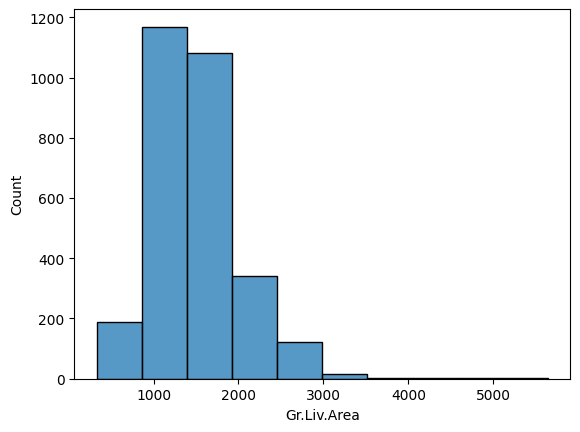

In [129]:
sns.histplot(area, bins=10)  #or you can use bins=10 as well (area, bins=10)

## The unknown sampling distribution
In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [130]:
sampl1 = area.sample(50) #takes random sample of size 50

In [131]:
sampl1.describe()

count      50.000000
mean     1585.720000
std       549.141075
min       672.000000
25%      1200.750000
50%      1549.000000
75%      1936.000000
max      3279.000000
Name: Gr.Liv.Area, dtype: float64

<Axes: xlabel='Gr.Liv.Area', ylabel='Count'>

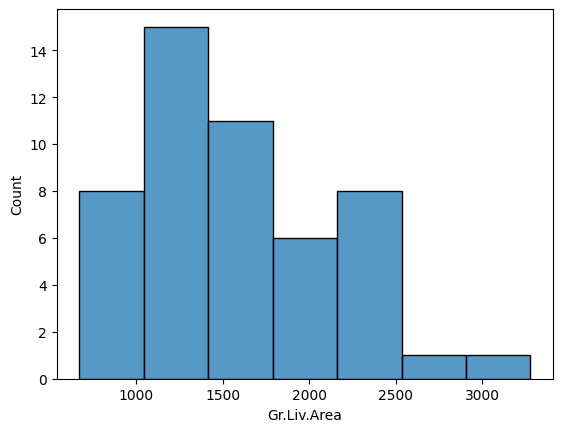

In [132]:
sns.histplot(sampl1)

**Exercise 2**

Describe the distribution of this sample. How does it compare to the distribution of the population?

**Answer**

The distribution of the sampl1 is Bi-modal. The mean of sampl1 is 1585.96 as compared to the population mean i.e. 1499.69 which is a uni-modal distribution.
As the distribution is Bi-modal, there no skewness in the distribution.

In [133]:
sampl1.describe()

count      50.000000
mean     1585.720000
std       549.141075
min       672.000000
25%      1200.750000
50%      1549.000000
75%      1936.000000
max      3279.000000
Name: Gr.Liv.Area, dtype: float64

In [134]:
sampl1.mean() #retrieves the mean of the sampled dataset.

1585.72

In [135]:
area.mean()

1499.6904436860068

**Exercise 3**

Take a second sample, also of size 50, and call it sampl2. How does the mean of sampl2 compare with the mean of sampl1? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

**Answer**

As the sample size increases, the accuracy increases as well.

Sampl4 with 1000 samples provides a more accurate estimate of the population mean.

In [142]:
sampl2 = area.sample(50) #takes the sample from the dataset.
sampl3 = area.sample(100)
sampl4 = area.sample(1000)

In [143]:
sampl2.mean()

1341.48

In [144]:
sampl3.mean()

1472.43

In [145]:
sampl4.mean()

1510.537

Every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the sampling distribution, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

<Axes: ylabel='Count'>

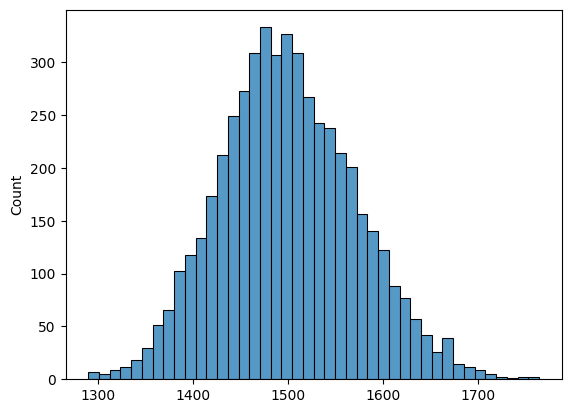

In [140]:
sample_mean50 = [area.sample(50).mean() for i in range (0, 5000)]
sns.histplot(sample_mean50)

**Exercise 4**

How many elements are there in sample_means50? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

**Answer**

There are 5000 elements in the sample_means50 and Yes, there is a slight change in the distribution when the sample is updated from 5000 to 50,000 but the mean would remain same.

<Axes: ylabel='Count'>

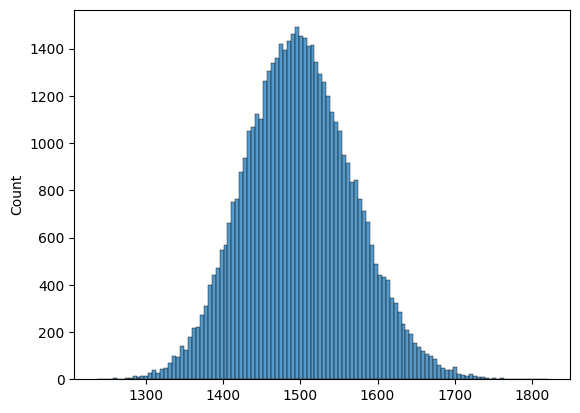

In [122]:
sample_mean50 = [area.sample(50).mean() for i in range (0, 50000)]
sns.histplot(sample_mean50)

 **Exercise 5**

 Run a loop that takes a sample of size 50 from area and stores the sample mean in sample_means_small, but only iterate from 1 to 100. Print the output. How many elements are there in this object called sample_means_small? What does each element represent?

 **Answer**

 There are 99 elements in the sample_means_small. Each value represents the randomly selected values from the area.

In [123]:
sample_mean1 = [area.sample(50).mean() for i in range (1, 100)]
len(sample_mean1)

99

**Exercise 6**

When the sample size is larger, what happens to the center? What about the spread?

**Answer**

As the sample size increases, the distribution becomes more normal. The center value becomes more centric and the spread becomes more like normal distribution.

# **On Your Own**

**Q.1**

Take a random sample of size 50 from price. Using this sample, what is your best point estimate of the population mean?


**Answer**

The population mean is 180796.06 and the best point estimate of the population mean from the random sample size50 is the mean value i.e. 181412.08

In [146]:
price.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [152]:
sample1 = price.sample(50)

In [153]:
sample1.describe()

count        50.000000
mean     181412.080000
std       71530.561156
min       84500.000000
25%      132975.000000
50%      162250.000000
75%      225625.000000
max      462000.000000
Name: SalePrice, dtype: float64

**Q.2**

Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called sample_means50. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

**Answer**

The sampling distribution is normal and symmetric in nature. The mean home price of sample_mean50 is 1,79,990 and the population mean as per the calculation below is 180796.06

<Axes: ylabel='Count'>

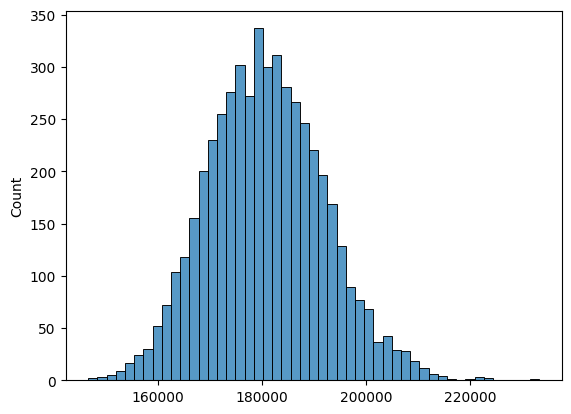

In [154]:
sample_mean50 = [price.sample(50).mean() for i in range (0, 5000)]
sns.histplot(sample_mean50)

In [157]:
price.mean()

180796.0600682594

**Q.3.**

Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

**Answer**

The sampling distribution of sample_means150 is slightly varying from sample_means50 and the mean sale price is 1,80,000.
This sample has lesser spread compared to sample_means50.

<Axes: ylabel='Count'>

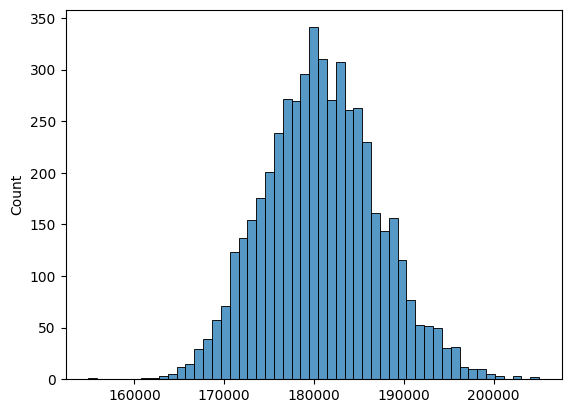

In [156]:
sample_mean150 = [price.sample(150).mean() for i in range (0, 5000)]
sns.histplot(sample_mean150)

**Q.4.**

Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

**Answer**

Out of sample_means50 and sample_means150, the sample_means150 has lesser spread and in order to estimate the closer true value, we should prefer the distribution having lesser spread.